**Chapter 09**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 4

In [28]:
np.random.seed(131)
x_1 = np.random.normal(0,1,100)
x_2 = 3 * x_1*x_1 + 4 + np.random.normal(0,1,100)
indices = np.random.choice(100, 50, replace=False)
x_2[indices] += 6
X = np.vstack((x_1,x_2)).T
y = np.full((100,1),1.0)
y[indices] = -1.0

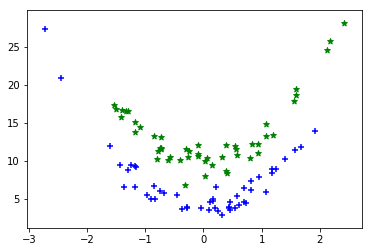

In [31]:
for idx, y_value in enumerate(y):
    if y_value == 1.0:
        plt.scatter([X[idx,0]],[X[idx,1]],c='b',marker='+')
    else:
        plt.scatter([X[idx,0]],[X[idx,1]],c='g', marker='*')

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
y = y.reshape(100,)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4)
# use polynoimal kernel
poly_svc = SVC(kernel='poly')
poly_svc.fit(X_train, y_train)
poly_pred = poly_svc.predict(X_test)
print('polynomial kernel test data score: ', accuracy_score(poly_pred, y_test))

polynomial kernel test data score:  0.975


In [34]:
# use rbf kernel 
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X_train, y_train)
rbf_pred = rbf_svc.predict(X_test)
print('rbf kernel test dataset score: ', accuracy_score(rbf_pred, y_test))

rbf kernel test dataset score:  0.875


# 5

## 5(a)

In [44]:
x1 = np.random.uniform(0,1,500) - 0.5
x2 = np.random.uniform(0,1,500) - 0.5
y =1*(x1*x1 - x2*x2>0)

## 5(b)

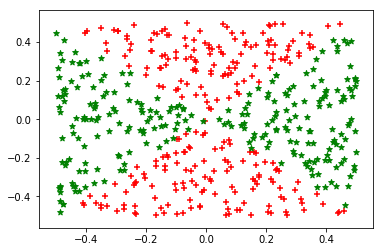

In [47]:
plt.scatter(x1[y==0],x2[y==0], c='r', marker='+')
plt.scatter(x1[y==1],x2[y==1], c='g', marker='*')

## 5(c,d)

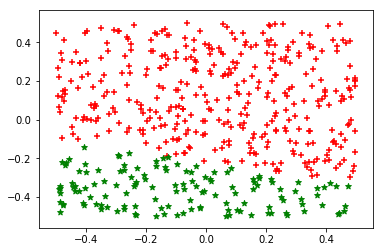

In [48]:
from sklearn.linear_model import LogisticRegression
X = np.vstack((x1,x2)).T
lr = LogisticRegression()
lr.fit(X, y)
y_pred = lr.predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='r', marker='+')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='g', marker='*')

## 5 (e,f)

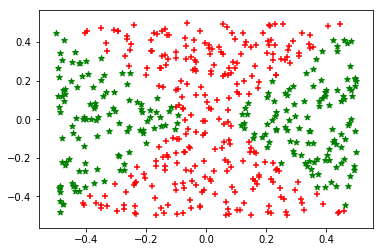

In [50]:
X_new = np.vstack((
    np.power(X[:,0],2),
    np.power(X[:,1],2),
    X[:,0] * X[:,1])).T
lr = LogisticRegression()
lr.fit(X_new, y)
y_pred = lr.predict(X_new)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='r', marker='+')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='g', marker='*')

## 6(g)

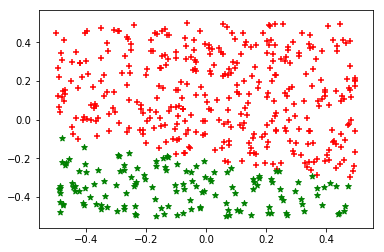

In [51]:
from sklearn.svm import LinearSVC
linear_svc = LinearSVC()
linear_svc.fit(X,y)
y_pred = linear_svc.predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='r', marker='+')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='g', marker='*')

## 6(h)

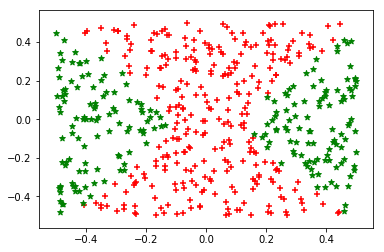

In [53]:
rbf_svc = SVC(kernel='rbf')
rbf_svc.fit(X, y)
y_pred = rbf_svc.predict(X)
plt.scatter(X[y_pred==0,0],X[y_pred==0,1],c='r', marker='+')
plt.scatter(X[y_pred==1,0],X[y_pred==1,1],c='g', marker='*')

# 6
Pass

# 7

In [66]:
auto_file_path = '../data/Auto'
autos = pd.read_table(auto_file_path,sep='\s+',na_values='?')
autos=autos.dropna()
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


## 7(a)

In [68]:
mpg_median = np.median(autos['mpg'])
autos['mpg_status'] = [1 if item >= mpg_median else 0 for item in autos['mpg']]
autos.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,mpg_status
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,0


## 7(b)

/Users/gaufung/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


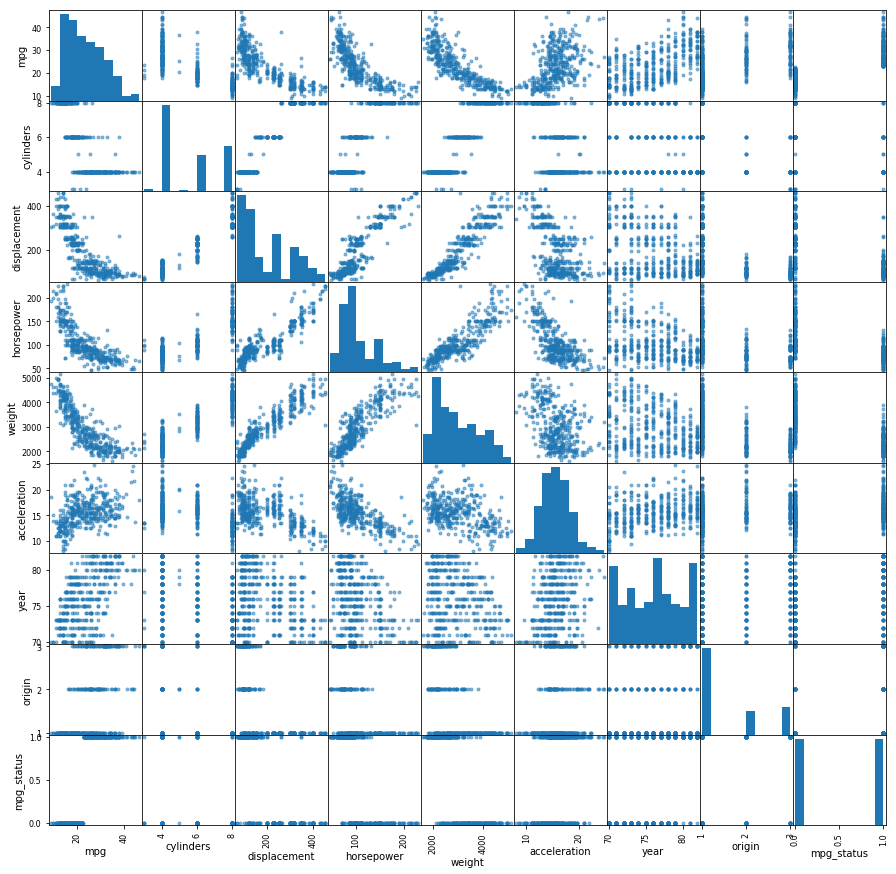

In [71]:
from pandas.tools.plotting import scatter_matrix
fig, ax = plt.subplots(figsize=(15, 15))
scatter_matrix(autos,ax=ax);

## 7(c)

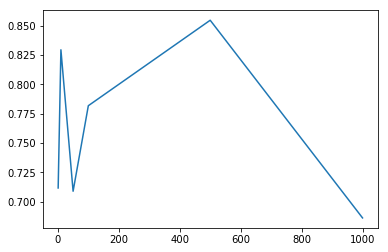

In [75]:
from sklearn.cross_validation import cross_val_score
X = autos[['displacement','horsepower','weight','acceleration']].values
y = autos['mpg_status'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4)
Cs = [1,10,50,100,500,1000]
scores = []
for c in Cs:
    clf = LinearSVC(C=c)
    score = cross_val_score(clf, X_train, y_train, cv=5)
    scores.append(score.mean())
plt.plot(Cs,scores)

In [90]:
clf = LinearSVC(C=500)
clf.fit(X_train,y_train)
pred = clf.predict(X_test)
print('test data set score: ', accuracy_score(pred, y_test))

test data set score:  0.866242038217


## 7(c,d)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.svm import SVC
# set the parameter by cross-validation
tuned_parameters = [
    {
        'kernel':['rbf'],
        'gamma':[1e-3,1e-4],
        'C':[1,10,100,1000]
    },
    {
        'kernel':['poly'],
        'C':[1,10,100,1000]
    }
]
scores = ['precision', 'recall']
for score in scores:
    clf = GridSearchCV(SVC(C=1), tuned_parameters,cv=5,
                       scoring='%s_macro' % score)
    clf.fit(X_train, y_train)
    print("Best parameters set found on development set:")
    print(clf.best_params_)

# 8

In [3]:
oj_file_path = '../data/OJ.csv'
oj = pd.read_csv(oj_file_path, index_col=0)
oj.head()

,Purchase,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,Store7,PctDiscMM,PctDiscCH,ListPriceDiff,STORE
1,CH,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,No,0.000000,0.000000,0.24,1
2,CH,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,No,0.150754,0.000000,0.24,1
3,CH,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,No,0.000000,0.091398,0.23,1
4,MM,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,No,0.000000,0.000000,0.00,1
5,CH,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,Yes,0.000000,0.000000,0.00,0


## 8(a)

In [5]:
oj.columns

Index(['Purchase', 'WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE'],
      dtype='object')

In [6]:
df_X = oj[['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store7', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE']]
df_X = pd.get_dummies(df_X, prefix=['Store'])

In [7]:
df_X.head()

,WeekofPurchase,StoreID,PriceCH,PriceMM,DiscCH,DiscMM,SpecialCH,SpecialMM,LoyalCH,SalePriceMM,SalePriceCH,PriceDiff,PctDiscMM,PctDiscCH,ListPriceDiff,STORE,Store_No,Store_Yes
1,237,1,1.75,1.99,0.00,0.0,0,0,0.500000,1.99,1.75,0.24,0.000000,0.000000,0.24,1,1,0
2,239,1,1.75,1.99,0.00,0.3,0,1,0.600000,1.69,1.75,-0.06,0.150754,0.000000,0.24,1,1,0
3,245,1,1.86,2.09,0.17,0.0,0,0,0.680000,2.09,1.69,0.40,0.000000,0.091398,0.23,1,1,0
4,227,1,1.69,1.69,0.00,0.0,0,0,0.400000,1.69,1.69,0.00,0.000000,0.000000,0.00,1,1,0
5,228,7,1.69,1.69,0.00,0.0,0,0,0.956535,1.69,1.69,0.00,0.000000,0.000000,0.00,0,0,1


In [9]:
X = df_X[['WeekofPurchase', 'StoreID', 'PriceCH', 'PriceMM', 'DiscCH',
       'DiscMM', 'SpecialCH', 'SpecialMM', 'LoyalCH', 'SalePriceMM',
       'SalePriceCH', 'PriceDiff', 'Store_No','Store_Yes', 'PctDiscMM', 'PctDiscCH',
       'ListPriceDiff', 'STORE']].values
y = oj['Purchase'].values

In [10]:
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=(y.shape[0]-800)/y.shape[0])

## 8(b)

In [14]:
from sklearn.svm import SVC
clf = SVC(C=0.01,kernel='linear')
clf.fit(X_train, y_train)

SVC(C=0.01, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## 8(c)

In [15]:
from sklearn.metrics import accuracy_score
train_pred = clf.predict(X_train)
print(accuracy_score(train_pred, y_train))

0.77125


In [16]:
test_pred = clf.predict(X_test)
print(accuracy_score(test_pred, y_test))

0.803703703704


## 8(d)

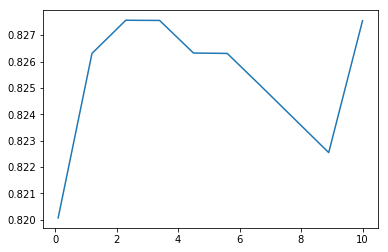

In [21]:
from sklearn.cross_validation import cross_val_score
Cs = np.linspace(0.1,10, 10)
scores = []
for c in Cs:
    clf = SVC(C=c, kernel='linear')
    score = cross_val_score(clf,X_train,y_train,cv=5)
    scores.append(score.mean())
plt.plot(Cs,scores)

## 8(e)

In [22]:
clf = SVC(C=3,kernel='linear')
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
print('train data set score: ', accuracy_score(pred_train, y_train))
pred_test = clf.predict(X_test)
print('test data set score: ', accuracy_score(pred_test, y_test))

train data set score:  0.8275
test data set score:  0.848148148148


## 8(f)

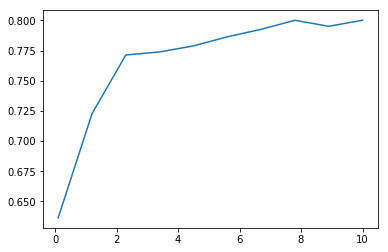

In [23]:
Cs = np.linspace(0.1,10, 10)
scores = []
for c in Cs:
    clf = SVC(C=c, kernel='rbf')
    score = cross_val_score(clf,X_train,y_train,cv=5)
    scores.append(score.mean())
plt.plot(Cs,scores)

In [24]:
clf = SVC(C=10,kernel='rbf')
clf.fit(X_train, y_train)
pred_train = clf.predict(X_train)
print('train data set score: ', accuracy_score(pred_train, y_train))
pred_test = clf.predict(X_test)
print('test data set score: ', accuracy_score(pred_test, y_test))

train data set score:  0.85375
test data set score:  0.818518518519


## 8(g)

In [ ]:
Cs = np.linspace(0.1,10, 10)
scores = []
for c in Cs:
    clf = SVC(C=c, kernel='poly', degree=2)
    score = cross_val_score(clf,X_train,y_train,cv=5)
    scores.append(score.mean())
plt.plot(Cs,scores)